In [12]:

from scipy.cluster.hierarchy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np





def getClusters(Z):
#     from heapq import *
    from heapq import heappush, heappop
    j = 0
    clusters = []
    dis = np.unique(Z[:,2]).tolist()
#     dis.append(1)
    if dis[0] == 0:
        dis = dis[1:]
    for hei in dis:
        cutree = cut_tree(Z, height=hei)
        labels = np.unique(cutree)
        for label in labels:
            temp = np.where(cutree == label)[0]
            if len(temp) > 1:
                heappush(clusters,(len(temp),j,temp,hei))
                j += 1
    table = [heappop(clusters) for i in range(len(clusters))][::-1]
    return [(item[0],item[2],item[3]) for item in table ]


def plot_table(axes, df, sub_mat = None, title = 'matrix'):
    axes.set_title(title)
    data = df.values
    axes.axis('off')
    stripe = np.empty(np.array(data).shape, dtype=np.dtype(('U10', 1)) )
    rowColours = []
    colWidths = [0.12 for _ in range(0, stripe.shape[0])]
    for i in range(0,stripe.shape[0]):
        for j in range(0, stripe.shape[1]):

            if i % 2 == 0:
                stripe[i,j] = '0.9'

            else:
                stripe[i,j] = 'w'
    if sub_mat is not None:
        for i in sub_mat[0]:
            for j in sub_mat[1]:
                stripe[i,j] = 'g'

    rowColours = []
    for j in range(0, stripe.shape[0]):
        if j % 2 == 0:    
            rowColours.append('0.9')
        else:
            rowColours.append('1.0')
    stripe
    axes.table(cellText=data,
                          cellColours=stripe,
                          rowColours = rowColours,
                          loc='center',
                          rowLabels=list(df.index),
                          colLabels=list(df.columns),
                          colWidths = colWidths,
                          )

def plot_parallel(ax, df, title = 'Parallel coordinates'):
    

    ax.set_title(title)
    df["index"] = df.index.values
    pd.plotting.parallel_coordinates(
            df, "index", ax=ax,
#             color=('#556270', '#4ECDC4', '#C7F464')
    )

    
def parallelPlot(ax, mat, submat, title):
    rows, cols = submat[0], submat[1]
    df = pd.DataFrame(mat[rows][:,cols],
                      index=rows,columns=cols)
    plot_parallel(ax,df,title=title)



def hClustering(mat,method, metric):
    ZR = linkage(mat,method, metric)
    ZC = linkage(np.transpose(mat),method, metric)
    clusR = getClusters(ZR)
    clusC = getClusters(ZC)
    import pprint
    pp = pprint.PrettyPrinter(indent=1)
    
    print(f'\nClusC of {method}:')
    pp.pprint(clusC)
    print(f'\nClusR of {method}:')
    pp.pprint(clusR)

    
#     fig, axes = plt.subplots(2, 2, figsize=(12, 15))
    fig5 = plt.figure(figsize=(12, 15),constrained_layout=False)
    widths = [1, 1]
    heights = [1, 2]
    spec5 = fig5.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                              height_ratios=heights)

    axes = np.empty((2,2),dtype = object)
    for row in range(2):
        for col in range(2):
            axes[row][col] = fig5.add_subplot(spec5[row, col])
    
    dendrogram(ZR, ax=axes[0,0] )
    axes[0,0].set_title(f'Dendrogram of ClusR of {method}')
    dendrogram(ZC, ax=axes[0,1])
    axes[0,1].set_title(f'Dendrogram of ClusC of {method}')

    mat_df = pd.DataFrame(mat)
    plot_table(axes[1,0],mat_df,sub_mat=[clusR[0][1],clusC[0][1]],
               title = f'Bicluster of {method}')

    parallelPlot(axes[1,1],mat,[clusR[0][1],clusC[0][1]],
               title = f'Parallel coordinates of bicluster of {method}')

    fig5.savefig(f'images/{method}.pdf')


    


ClusC of single:
[(9, array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 0.45),
 (7, array([3, 4, 5, 6, 7, 8, 9]), 0.4),
 (3, array([3, 5, 9]), 0.35)]

ClusR of single:
[(18,
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 18,
       19]),
  0.4),
 (4, array([ 1,  6,  9, 14]), 0.3),
 (3, array([ 1,  6, 14]), 0.2),
 (2, array([10, 12]), 0.4),
 (2, array([15, 19]), 0.3),
 (2, array([10, 12]), 0.3),
 (2, array([7, 8]), 0.3),
 (2, array([2, 3]), 0.3),
 (2, array([10, 12]), 0.2)]


FileNotFoundError: [Errno 2] No such file or directory: 'images/single.pdf'

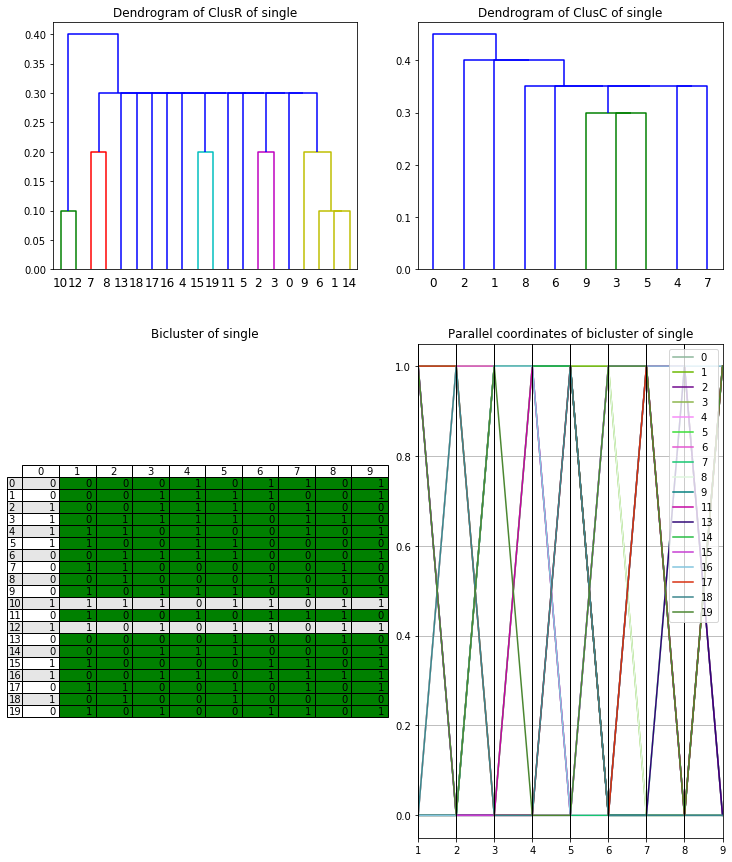

In [13]:
methods = {'single':'hamming',
           'complete':'hamming',
           'average':'hamming',
           'ward':'euclidean' }

size = (20,10)
mat = np.random.choice([1,0],size)
for method, metric in methods.items():
    hClustering(mat,method,metric)